# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Assuming city_weather is the JSON response from the API
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | flying fish cove
Processing Record 3 of Set 1 | bikenibeu village
Processing Record 4 of Set 1 | tchintabaraden
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | sinabang
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | mel'nikovo
Processing Record 10 of Set 1 | guaruja
Processing Record 11 of Set 1 | sarykemer
Processing Record 12 of Set 1 | pokaran
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | bosaso
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | howard springs
Processing Record 20 of Set 1 | cruzeiro do sul
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | blackm

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,23.03,78,41,1.04,US,1724631716
1,flying fish cove,-10.4217,105.6791,25.82,83,100,4.63,CX,1724631916
2,bikenibeu village,1.3673,173.1241,30.98,74,20,5.66,KI,1724631918
3,tchintabaraden,15.8969,5.7985,32.23,45,88,8.23,NE,1724631919
4,tiksi,71.6872,128.8694,2.55,86,100,7.71,RU,1724631920


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,23.03,78,41,1.04,US,1724631716
1,flying fish cove,-10.4217,105.6791,25.82,83,100,4.63,CX,1724631916
2,bikenibeu village,1.3673,173.1241,30.98,74,20,5.66,KI,1724631918
3,tchintabaraden,15.8969,5.7985,32.23,45,88,8.23,NE,1724631919
4,tiksi,71.6872,128.8694,2.55,86,100,7.71,RU,1724631920


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


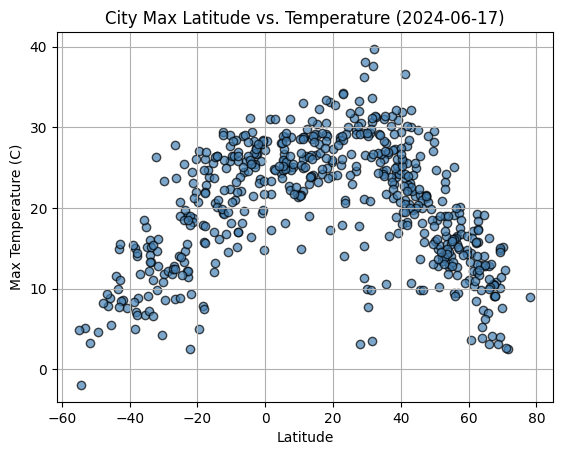

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']  
max_temp = city_data_df['Max Temp']

plt.scatter(lat, max_temp, color='steelblue', edgecolor='black', alpha=0.7)

plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

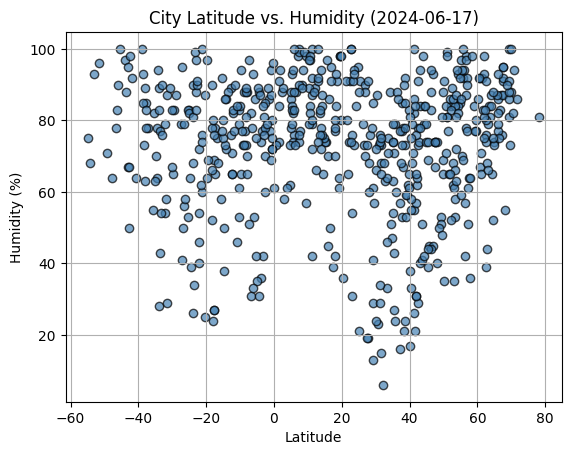

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']  
humidity = city_data_df['Humidity']

plt.scatter(lat, humidity, color='steelblue', edgecolor='black', alpha=0.7)

plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

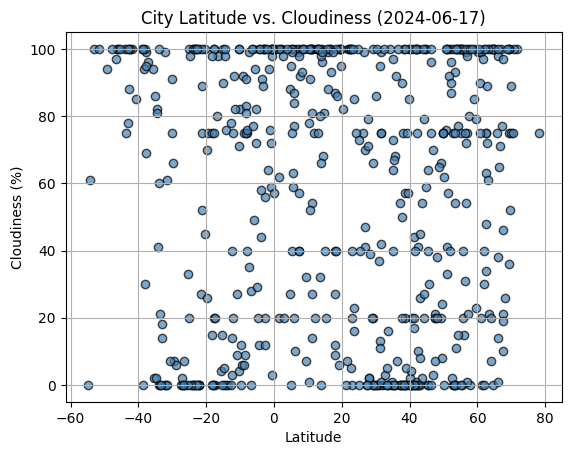

In [12]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']  
cloudiness = city_data_df['Cloudiness']

plt.scatter(lat, cloudiness, color='steelblue', edgecolor='black', alpha=0.7)

plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

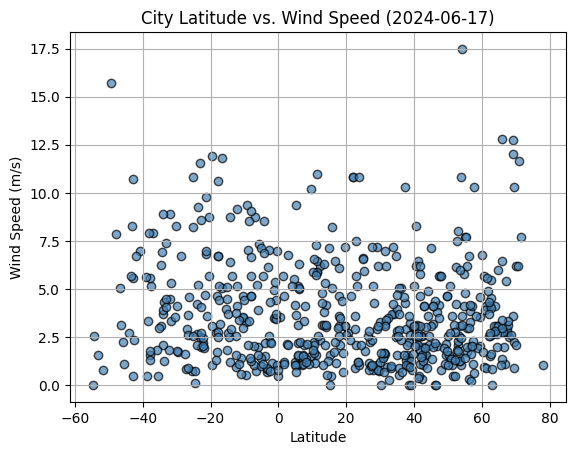

In [13]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']  
wind_speed = city_data_df['Wind Speed']

plt.scatter(lat, wind_speed, color='steelblue', edgecolor='black', alpha=0.7)

plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
random_x_values = np.random.uniform(0, 100, 100)
random_y_values = np.random.uniform(0, 100, 100)

In [32]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regression_values = x*slope + intercept
    plt.scatter(x, y)
    plt.plot(x, regression_values)
    plt.annotate(f"y = {slope}x + {intercept}", (5, 5))
    plt.xlabel()
    plt.ylabel()
    plt.title()
    plt.grid()
    plt.show()
    

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,23.03,78,41,1.04,US,1724631716
2,bikenibeu village,1.3673,173.1241,30.98,74,20,5.66,KI,1724631918
3,tchintabaraden,15.8969,5.7985,32.23,45,88,8.23,NE,1724631919
4,tiksi,71.6872,128.8694,2.55,86,100,7.71,RU,1724631920
6,sinabang,2.4803,96.3801,24.87,88,100,2.11,ID,1724631922


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_data = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,flying fish cove,-10.4217,105.6791,25.82,83,100,4.63,CX,1724631916
5,port-aux-francais,-49.3500,70.2167,4.63,71,94,15.74,TF,1724631921
7,port mathurin,-19.6833,63.4167,20.68,64,70,11.91,MU,1724631924
9,guaruja,-23.9931,-46.2564,13.27,26,100,4.20,BR,1724631878
13,adamstown,-25.0660,-130.1015,20.74,83,100,10.80,PN,1724631930


###  Temperature vs. Latitude Linear Regression Plot

In [36]:
print(city_data_df)

                      City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0                   albany  42.6001  -73.9662     23.03        78          41   
1         flying fish cove -10.4217  105.6791     25.82        83         100   
2        bikenibeu village   1.3673  173.1241     30.98        74          20   
3           tchintabaraden  15.8969    5.7985     32.23        45          88   
4                    tiksi  71.6872  128.8694      2.55        86         100   
...                    ...      ...       ...       ...       ...         ...   
574                  galle   6.0367   80.2170     28.29        83          84   
575           alto barinas   8.5931  -70.2261     21.70        94         100   
576             monte maiz -33.2046  -62.6008      6.63        54           0   
577               timimoun  29.2639    0.2310     36.21        13           0   
578                  ha'il  

The r^2-value is: -0.67


<function matplotlib.pyplot.show(close=None, block=None)>

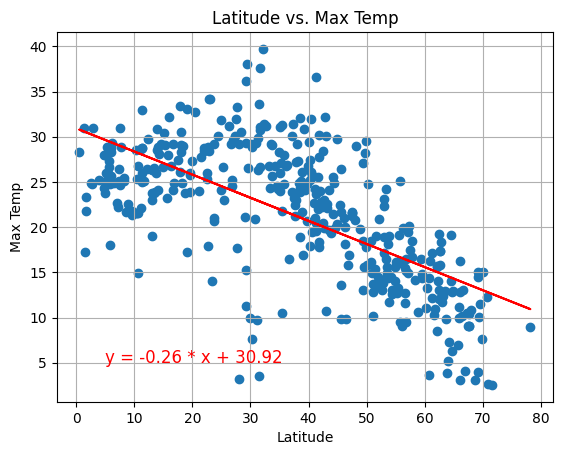

In [78]:
# Linear regression on Northern Hemisphere

x = northern_hemisphere_data['Lat']
y = northern_hemisphere_data['Max Temp']

# Linear regression on Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept

# Create the scatter plot with the regression line
plt.scatter(x, y)
plt.plot(x, regression_values, color='red')

# Annotate with the linear equation
plt.annotate(f"y = {slope:.2f} * x + {intercept:.2f}", 
             xy=(5, 5),  
             color='red', 
             fontsize=12)

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')
plt.grid(True)

# Show plot
print(f"The r^2-value is: {rvalue:.2f}")
plt.show

The r^2-value is: 0.77


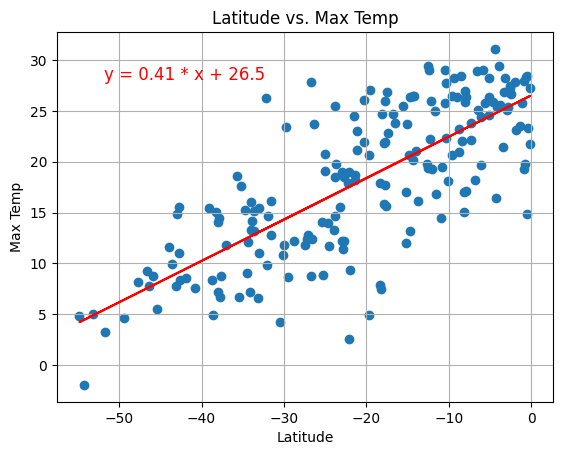

In [79]:
# Linear regression on Southern Hemisphere
x = southern_hemisphere_data['Lat']
y = southern_hemisphere_data['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept

# Create the scatter plot with the regression line
plt.scatter(x, y)
plt.plot(x, regression_values, color='red')

# Annotate with the linear equation in the top-left corner
plt.annotate(f"y = {slope:.2f} * x + {intercept:.1f}", 
             xy=(min(x) + 3, max(y) - 3), 
             color='red', 
             fontsize=12)

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')
plt.grid(True)

# Show plot
print(f"The r^2-value is: {rvalue:.2f}")
plt.show()

**Discussion about the linear relationship:** 
What I’m understanding from the two images is that the closer the regression line is to 0 latitude, the hotter the temperature gets. Essentially, a latitude of 0 represents the equator. The linear regression analysis in these plots supports this, showing a trend where temperatures increase as you approach the equator. Specifically, in the Southern Hemisphere, the positive slope indicates that as you move towards the equator (latitude increases), the maximum temperature rises. The R² value of 0.67 in the Southern Hemisphere suggests a moderate correlation, meaning that latitude plays a significant role in determining temperature, though other factors also contribute.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.03


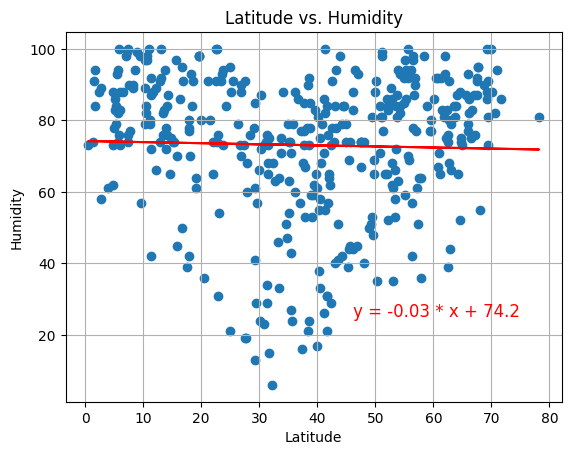

In [111]:
# Northern Hemisphere
x = northern_hemisphere_data['Lat']
y = northern_hemisphere_data['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept

# Create the scatter plot with the regression line
plt.scatter(x, y)
plt.plot(x, regression_values, color='red')

# Annotate with the linear equation in the top-left corner
plt.annotate(f"y = {slope:.2f} * x + {intercept:.1f}", 
             xy=(min(x) + 60, max(y) - 75), 
             color='red', 
             fontsize=12, 
             ha='center')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.grid(True)

# Show plot
print(f"The r^2-value is: {rvalue:.2f}")
plt.show()

The r^2-value is: -0.08


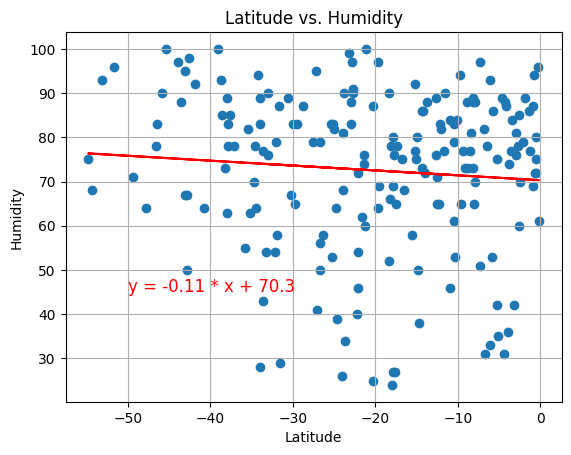

In [105]:
# Southern Hemisphere
x = southern_hemisphere_data['Lat']
y = southern_hemisphere_data['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept

# Create the scatter plot with the regression line
plt.scatter(x, y)
plt.plot(x, regression_values, color='red')

# Annotate with the linear equation in the top-left corner
plt.annotate(f"y = {slope:.2f} * x + {intercept:.1f}", 
             xy=(min(x) + 15, max(y) - 55), 
             color='red', 
             fontsize=12, 
             ha='center')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.grid(True)

# Show plot
print(f"The r^2-value is: {rvalue:.2f}")
plt.show()

**Discussion about the linear relationship:** The scatter plots show how humidity changes with latitude. The blue dots are data points, and the red line shows a trend. The equation ( y = 0.11x + 70.03 ) means that as you move closer to the equator (latitude 0), humidity increases slightly. For every degree increase in latitude, humidity goes up by 0.11%. This helps us understand how location affects humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.06


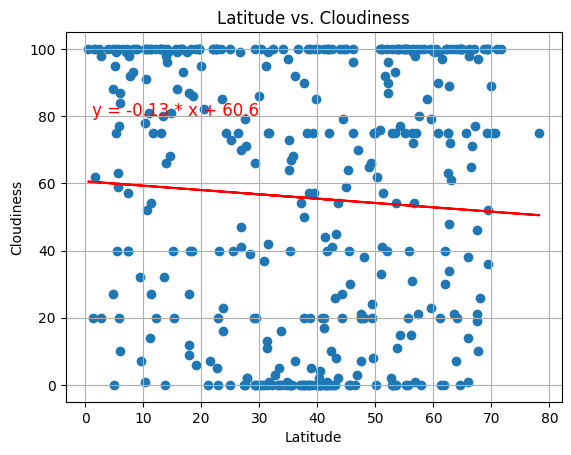

In [100]:
# Northern Hemisphere
x = northern_hemisphere_data['Lat']
y = northern_hemisphere_data['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept

# Create the scatter plot with the regression line
plt.scatter(x, y)
plt.plot(x, regression_values, color='red')

# Annotate with the linear equation in the top-left corner
plt.annotate(f"y = {slope:.2f} * x + {intercept:.1f}", 
             xy=(min(x) + 15, max(y) - 20), 
             color='red', 
             fontsize=12, 
             ha='center')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.grid(True)

# Show plot
print(f"The r^2-value is: {rvalue:.2f}")
plt.show()

The r^2-value is: -0.03


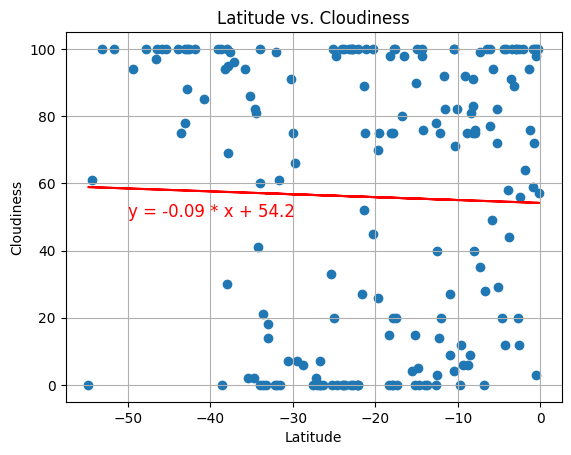

In [95]:
# Southern Hemisphere
x = southern_hemisphere_data['Lat']
y = southern_hemisphere_data['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept

# Create the scatter plot with the regression line
plt.scatter(x, y)
plt.plot(x, regression_values, color='red')

# Annotate with the linear equation in the top-left corner
plt.annotate(f"y = {slope:.2f} * x + {intercept:.1f}", 
             xy=(min(x) + 15, max(y) - 50), 
             color='red', 
             fontsize=12, 
             ha='center')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.grid(True)

# Show plot
print(f"The r^2-value is: {rvalue:.2f}")
plt.show()

**Discussion about the linear relationship:** The Southern Hemisphere shows a slight negative correlation, with the regression line ( y = -0.09x + 54.2 ), indicating that cloudiness decreases slightly as latitude increases. Similarly, The Northern Hemisphere, with the regression line ( y = -0.13x + 60.6 ) also shows a negative correlation, but with a steeper slope. This suggests a slightly stronger decrease in cloudiness with increasing latitude compared to the first plot. Both relationships are weak, but the second plot indicates a more pronounced decrease in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.04


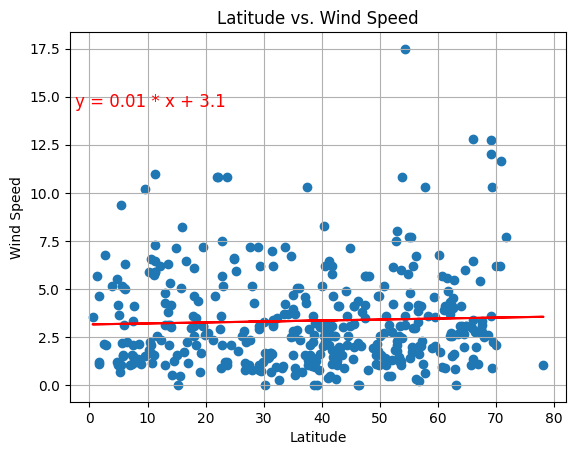

In [113]:
# Northern Hemisphere
x = northern_hemisphere_data['Lat']
y = northern_hemisphere_data['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept

# Create the scatter plot with the regression line
plt.scatter(x, y)
plt.plot(x, regression_values, color='red')

# Annotate with the linear equation in the top-left corner
plt.annotate(f"y = {slope:.2f} * x + {intercept:.1f}", 
             xy=(min(x) + 10, max(y) - 3), 
             color='red', 
             fontsize=12, 
             ha='center')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.grid(True)

# Show plot
print(f"The r^2-value is: {rvalue:.2f}")
plt.show()

The r^2-value is: -0.08


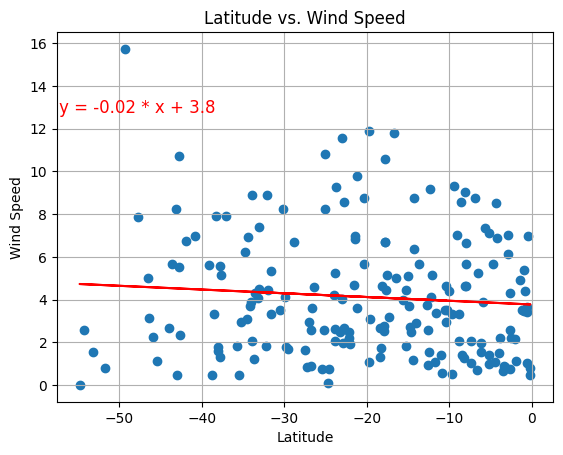

In [116]:
# Southern Hemisphere
x = southern_hemisphere_data['Lat']
y = southern_hemisphere_data['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept

# Create the scatter plot with the regression line
plt.scatter(x, y)
plt.plot(x, regression_values, color='red')

# Annotate with the linear equation in the top-left corner
plt.annotate(f"y = {slope:.2f} * x + {intercept:.1f}", 
             xy=(min(x) + 7, max(y) - 3), 
             color='red', 
             fontsize=12, 
             ha='center')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.grid(True)

# Show plot
print(f"The r^2-value is: {rvalue:.2f}")
plt.show()

**Discussion about the linear relationship:** The two scatter plots illustrate different linear relationships between latitude and wind speed. In the Northern Hemisphere, there is a slight positive correlation (( y = 0.01x + 3.1 )), indicating that wind speed increases slightly with latitude. Conversely, the Southern Hemisphere shows a slight negative correlation (( y = -0.02x + 3.8 )), suggesting that wind speed decreases slightly as latitude increases. Both relationships are weak, as indicated by the small slopes of the regression lines.